In [4]:
import pandas

In [5]:
import seaborn as sns
import geopandas as gpd
import matplotlib.pyplot as plt
import contextily as ctx
from geopandas_view import view
plt.rcParams['figure.figsize'] = [20,10]

In [6]:
racevisuals = gpd.read_parquet('race_dem_rates.parquet')

In [7]:
racevisuals.head()

,GEOID,NAMELSAD,CountyName,geometry,total_mf_10_19,median_household_income,white,black,amind,asian,nh_pi,two_or_more,total_pop,white_rate,black_rate,amind_rate,asian_rate,nh_pi_rate,two_or_more_rate
0,06091,Sierra County,Sierra,"POLYGON ((-120.65559 39.69356, -120.65552 39.6...",294.0,48125.0,2890.0,6.0,25.0,0.0,0.0,9.0,2930.0,0.986348,0.002048,0.008532,0.000000,0.000000,0.003072
1,06067,Sacramento County,Sacramento,"POLYGON ((-121.18857 38.71431, -121.18731 38.7...",196932.0,21635098.0,875793.0,149064.0,10340.0,235474.0,16715.0,107565.0,1510023.0,0.579987,0.098716,0.006848,0.155941,0.011069,0.071234
2,06083,Santa Barbara County,Santa Barbara,"MULTIPOLYGON (((-120.73429 34.90069, -120.7343...",64685.0,6803252.0,344026.0,8626.0,4389.0,23863.0,814.0,19996.0,443738.0,0.775291,0.019439,0.009891,0.053777,0.001834,0.045063
3,06009,Calaveras County,Calaveras,"POLYGON ((-120.63093 38.34110, -120.63057 38.3...",4245.0,554899.0,41375.0,302.0,492.0,568.0,126.0,1825.0,45235.0,0.914668,0.006676,0.010877,0.012557,0.002785,0.040345
4,06111,Ventura County,Ventura,"MULTIPOLYGON (((-119.32922 34.22784, -119.3292...",116814.0,15141748.0,680197.0,14835.0,7069.0,61772.0,1771.0,37561.0,848112.0,0.802013,0.017492,0.008335,0.072835,0.002088,0.044288


In [8]:
racevisuals['total_mf_10_19'] = racevisuals.total_mf_10_19 / racevisuals.total_pop
racevisuals.head()

,GEOID,NAMELSAD,CountyName,geometry,total_mf_10_19,median_household_income,white,black,amind,asian,nh_pi,two_or_more,total_pop,white_rate,black_rate,amind_rate,asian_rate,nh_pi_rate,two_or_more_rate
0,06091,Sierra County,Sierra,"POLYGON ((-120.65559 39.69356, -120.65552 39.6...",0.100341,48125.0,2890.0,6.0,25.0,0.0,0.0,9.0,2930.0,0.986348,0.002048,0.008532,0.000000,0.000000,0.003072
1,06067,Sacramento County,Sacramento,"POLYGON ((-121.18857 38.71431, -121.18731 38.7...",0.130417,21635098.0,875793.0,149064.0,10340.0,235474.0,16715.0,107565.0,1510023.0,0.579987,0.098716,0.006848,0.155941,0.011069,0.071234
2,06083,Santa Barbara County,Santa Barbara,"MULTIPOLYGON (((-120.73429 34.90069, -120.7343...",0.145773,6803252.0,344026.0,8626.0,4389.0,23863.0,814.0,19996.0,443738.0,0.775291,0.019439,0.009891,0.053777,0.001834,0.045063
3,06009,Calaveras County,Calaveras,"POLYGON ((-120.63093 38.34110, -120.63057 38.3...",0.093843,554899.0,41375.0,302.0,492.0,568.0,126.0,1825.0,45235.0,0.914668,0.006676,0.010877,0.012557,0.002785,0.040345
4,06111,Ventura County,Ventura,"MULTIPOLYGON (((-119.32922 34.22784, -119.3292...",0.137734,15141748.0,680197.0,14835.0,7069.0,61772.0,1771.0,37561.0,848112.0,0.802013,0.017492,0.008335,0.072835,0.002088,0.044288


In [9]:
racevisuals= racevisuals.rename(columns={'total_mf_10_19':'10-19poprate'})

In [10]:
racevisuals.head()

,GEOID,NAMELSAD,CountyName,geometry,10-19poprate,median_household_income,white,black,amind,asian,nh_pi,two_or_more,total_pop,white_rate,black_rate,amind_rate,asian_rate,nh_pi_rate,two_or_more_rate
0,06091,Sierra County,Sierra,"POLYGON ((-120.65559 39.69356, -120.65552 39.6...",0.100341,48125.0,2890.0,6.0,25.0,0.0,0.0,9.0,2930.0,0.986348,0.002048,0.008532,0.000000,0.000000,0.003072
1,06067,Sacramento County,Sacramento,"POLYGON ((-121.18857 38.71431, -121.18731 38.7...",0.130417,21635098.0,875793.0,149064.0,10340.0,235474.0,16715.0,107565.0,1510023.0,0.579987,0.098716,0.006848,0.155941,0.011069,0.071234
2,06083,Santa Barbara County,Santa Barbara,"MULTIPOLYGON (((-120.73429 34.90069, -120.7343...",0.145773,6803252.0,344026.0,8626.0,4389.0,23863.0,814.0,19996.0,443738.0,0.775291,0.019439,0.009891,0.053777,0.001834,0.045063
3,06009,Calaveras County,Calaveras,"POLYGON ((-120.63093 38.34110, -120.63057 38.3...",0.093843,554899.0,41375.0,302.0,492.0,568.0,126.0,1825.0,45235.0,0.914668,0.006676,0.010877,0.012557,0.002785,0.040345
4,06111,Ventura County,Ventura,"MULTIPOLYGON (((-119.32922 34.22784, -119.3292...",0.137734,15141748.0,680197.0,14835.0,7069.0,61772.0,1771.0,37561.0,848112.0,0.802013,0.017492,0.008335,0.072835,0.002088,0.044288


In [11]:
racevisuals['GEOID'] = [v[2:] for v in racevisuals.GEOID.values]

In [12]:
racevisuals.head()

,GEOID,NAMELSAD,CountyName,geometry,10-19poprate,median_household_income,white,black,amind,asian,nh_pi,two_or_more,total_pop,white_rate,black_rate,amind_rate,asian_rate,nh_pi_rate,two_or_more_rate
0,091,Sierra County,Sierra,"POLYGON ((-120.65559 39.69356, -120.65552 39.6...",0.100341,48125.0,2890.0,6.0,25.0,0.0,0.0,9.0,2930.0,0.986348,0.002048,0.008532,0.000000,0.000000,0.003072
1,067,Sacramento County,Sacramento,"POLYGON ((-121.18857 38.71431, -121.18731 38.7...",0.130417,21635098.0,875793.0,149064.0,10340.0,235474.0,16715.0,107565.0,1510023.0,0.579987,0.098716,0.006848,0.155941,0.011069,0.071234
2,083,Santa Barbara County,Santa Barbara,"MULTIPOLYGON (((-120.73429 34.90069, -120.7343...",0.145773,6803252.0,344026.0,8626.0,4389.0,23863.0,814.0,19996.0,443738.0,0.775291,0.019439,0.009891,0.053777,0.001834,0.045063
3,009,Calaveras County,Calaveras,"POLYGON ((-120.63093 38.34110, -120.63057 38.3...",0.093843,554899.0,41375.0,302.0,492.0,568.0,126.0,1825.0,45235.0,0.914668,0.006676,0.010877,0.012557,0.002785,0.040345
4,111,Ventura County,Ventura,"MULTIPOLYGON (((-119.32922 34.22784, -119.3292...",0.137734,15141748.0,680197.0,14835.0,7069.0,61772.0,1771.0,37561.0,848112.0,0.802013,0.017492,0.008335,0.072835,0.002088,0.044288


In [13]:
# racevisuals.plot(column='poprate', scheme='FisherJenks', k=5, legend=True, figsize=(15,15))

## Demographic Rates

<AxesSubplot:>

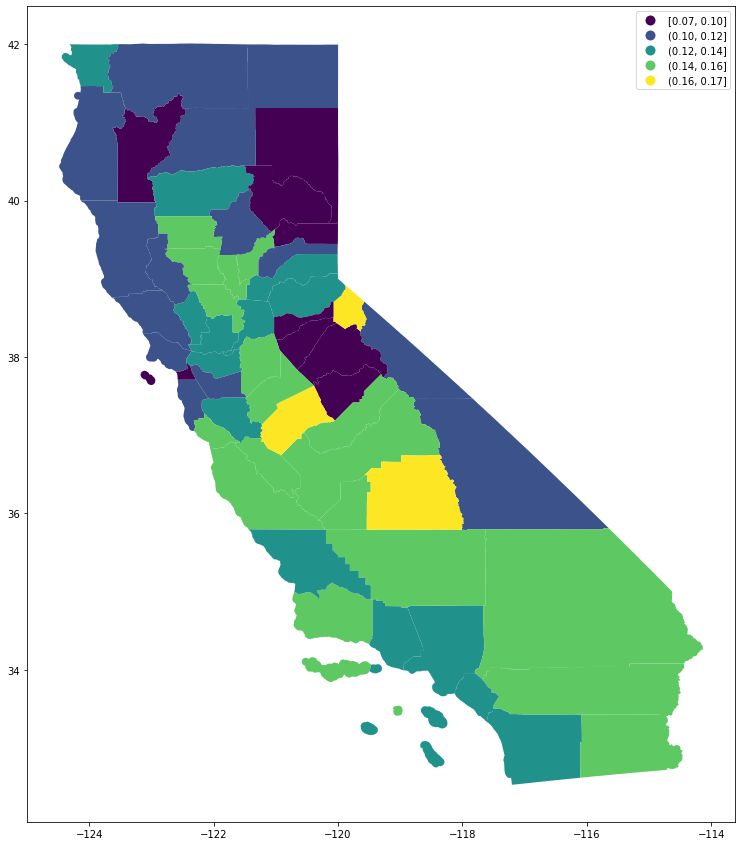

In [14]:
racevisuals.plot(column='10-19poprate', scheme='FisherJenks', k=5, legend=True, figsize=(15,15))

<AxesSubplot:>

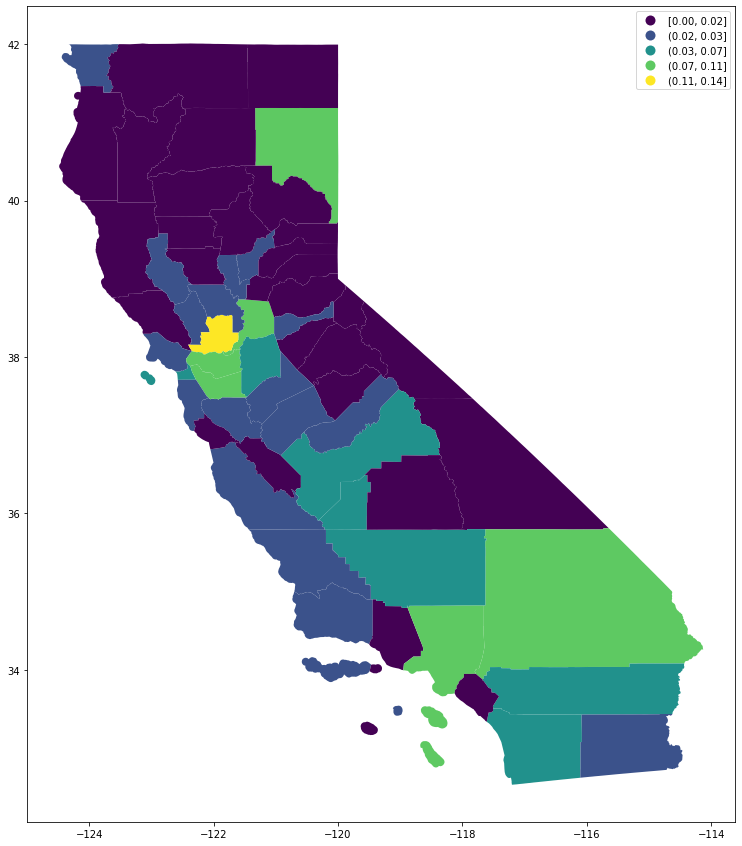

In [140]:
racevisuals.plot(column='black_rate', scheme='FisherJenks', k=5, legend=True, figsize=(15,15))

<AxesSubplot:>

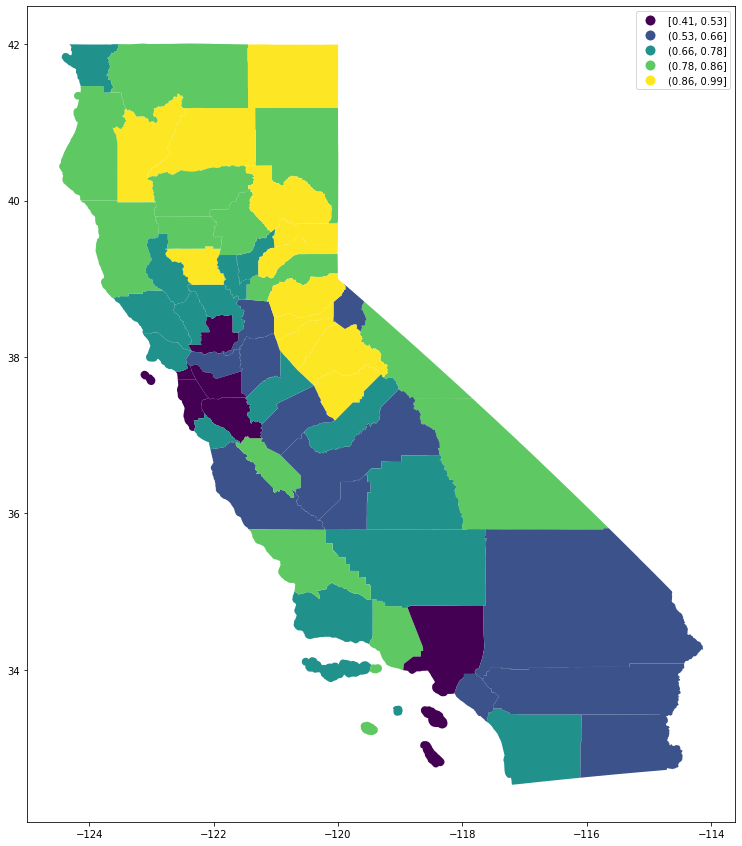

In [141]:
racevisuals.plot(column='white_rate', scheme='FisherJenks', k=5, legend=True, figsize=(15,15))

<AxesSubplot:>

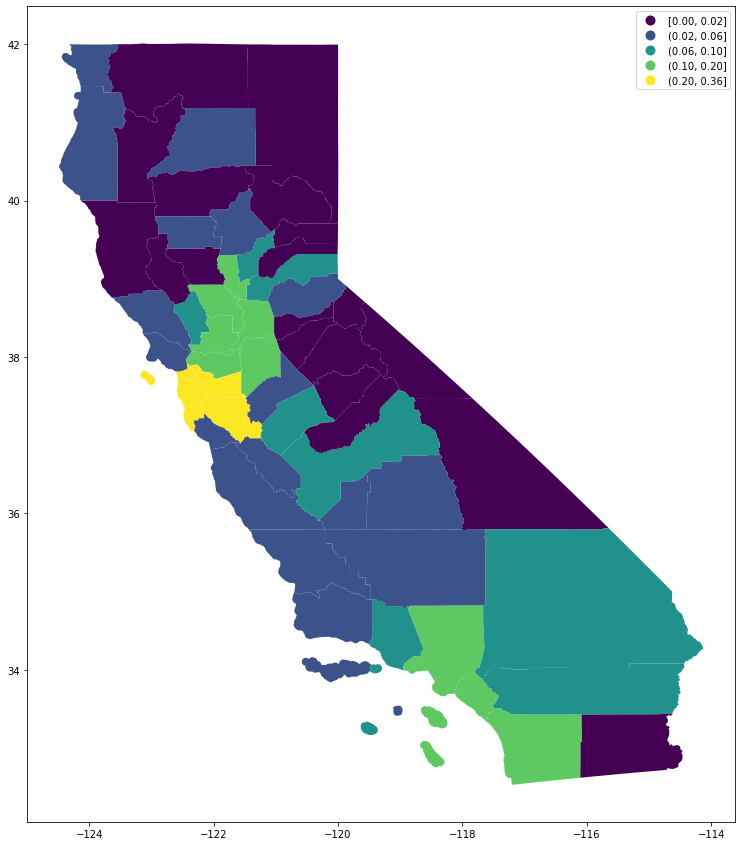

In [142]:
racevisuals.plot(column='asian_rate', scheme='FisherJenks', k=5, legend=True, figsize=(15,15))

In [143]:
latino_county = pandas.read_parquet('latino.parquet')

In [144]:
latino_county.head()

,Latino
county,
001,369061.0
003,105.0
005,5132.0
007,36358.0
009,5297.0


In [145]:
latino_county.reset_index(level=0,inplace=True)

In [146]:
latino_county.head()

,county,Latino
0,001,369061.0
1,003,105.0
2,005,5132.0
3,007,36358.0
4,009,5297.0


In [147]:
latino_county.shape

(58, 2)

In [148]:
latino_county['county'] = [v[1:] for v in latino_county.county.values]

In [149]:
latino_county.head()

,county,Latino
0,01,369061.0
1,03,105.0
2,05,5132.0
3,07,36358.0
4,09,5297.0


In [150]:
avg_income = gpd.read_parquet('avg_income.parquet')

In [151]:
avg_income.head()

,geoid,geometry,fips,name,state,CountyName,Unnamed: 0,Unnamed: 0.1,CountyCode,DistrictCode,SchoolCode,hsgradrate,Dropoutrate,county,median_household_income,median_home_value,per_capita_income
0,06001,"POLYGON ((-122.28088 37.70723, -122.28178 37.7...",1.0,Alameda,CA,Alameda,55058.786260,55058.786260,1.0,58955.743928,214044.350660,80.133171,10.740965,1.0,98936.975000,699858.432584,45224.541667
1,06005,"POLYGON ((-121.02729 38.48136, -121.02729 38.4...",5.0,Amador,CA,Amador,46067.993902,46067.993902,3.0,51356.797834,231815.176895,80.229825,3.787719,5.0,61656.444444,298988.888889,30229.777778
2,06007,"POLYGON ((-121.85650 39.53358, -121.85638 39.5...",7.0,Butte,CA,Butte,51652.976656,51652.976656,4.0,52482.102397,463580.839506,78.057168,15.140088,7.0,50684.764706,253241.176471,26936.000000
3,06009,"POLYGON ((-120.63093 38.34110, -120.63057 38.3...",9.0,Calaveras,CA,Calaveras,48949.265722,48949.265722,5.0,46217.943831,814737.532598,87.612575,5.551497,9.0,55489.900000,297550.000000,36696.600000
4,06011,"POLYGON ((-122.08018 39.41420, -122.07996 39.4...",11.0,Colusa,CA,Colusa,44884.890925,44884.890925,6.0,55662.107692,367130.161538,89.476074,7.255215,11.0,55385.200000,240540.000000,27744.800000


In [152]:
avg_income['geoid'] = [v[3:] for v in avg_income.geoid.values]

In [153]:
avg_income.head()

,geoid,geometry,fips,name,state,CountyName,Unnamed: 0,Unnamed: 0.1,CountyCode,DistrictCode,SchoolCode,hsgradrate,Dropoutrate,county,median_household_income,median_home_value,per_capita_income
0,01,"POLYGON ((-122.28088 37.70723, -122.28178 37.7...",1.0,Alameda,CA,Alameda,55058.786260,55058.786260,1.0,58955.743928,214044.350660,80.133171,10.740965,1.0,98936.975000,699858.432584,45224.541667
1,05,"POLYGON ((-121.02729 38.48136, -121.02729 38.4...",5.0,Amador,CA,Amador,46067.993902,46067.993902,3.0,51356.797834,231815.176895,80.229825,3.787719,5.0,61656.444444,298988.888889,30229.777778
2,07,"POLYGON ((-121.85650 39.53358, -121.85638 39.5...",7.0,Butte,CA,Butte,51652.976656,51652.976656,4.0,52482.102397,463580.839506,78.057168,15.140088,7.0,50684.764706,253241.176471,26936.000000
3,09,"POLYGON ((-120.63093 38.34110, -120.63057 38.3...",9.0,Calaveras,CA,Calaveras,48949.265722,48949.265722,5.0,46217.943831,814737.532598,87.612575,5.551497,9.0,55489.900000,297550.000000,36696.600000
4,11,"POLYGON ((-122.08018 39.41420, -122.07996 39.4...",11.0,Colusa,CA,Colusa,44884.890925,44884.890925,6.0,55662.107692,367130.161538,89.476074,7.255215,11.0,55385.200000,240540.000000,27744.800000


In [154]:
totalpop = gpd.read_parquet('totalpop.parquet')

In [155]:
totalpop.head()

,geometry,total_pop,GEOID
0,"POLYGON ((-120.65559 39.69356, -120.65552 39.6...",2930.0,06091
1,"POLYGON ((-121.18857 38.71431, -121.18731 38.7...",1510023.0,06067
2,"MULTIPOLYGON (((-120.73429 34.90069, -120.7343...",443738.0,06083
3,"POLYGON ((-120.63093 38.34110, -120.63057 38.3...",45235.0,06009
4,"MULTIPOLYGON (((-119.32922 34.22784, -119.3292...",848112.0,06111


In [156]:
totalpop['GEOID'] = [v[3:] for v in totalpop.GEOID.values]

In [157]:
totalpop.head()

,geometry,total_pop,GEOID
0,"POLYGON ((-120.65559 39.69356, -120.65552 39.6...",2930.0,91
1,"POLYGON ((-121.18857 38.71431, -121.18731 38.7...",1510023.0,67
2,"MULTIPOLYGON (((-120.73429 34.90069, -120.7343...",443738.0,83
3,"POLYGON ((-120.63093 38.34110, -120.63057 38.3...",45235.0,09
4,"MULTIPOLYGON (((-119.32922 34.22784, -119.3292...",848112.0,11


In [158]:
finalrace=totalpop.merge(latino_county, left_on="GEOID", right_on="county", how="left")

In [159]:
finalrace.head()

,geometry,total_pop,GEOID,county,Latino
0,"POLYGON ((-120.65559 39.69356, -120.65552 39.6...",2930.0,91,91,324.0
1,"POLYGON ((-121.18857 38.71431, -121.18731 38.7...",1510023.0,67,67,347025.0
2,"MULTIPOLYGON (((-120.73429 34.90069, -120.7343...",443738.0,83,83,200060.0
3,"POLYGON ((-120.63093 38.34110, -120.63057 38.3...",45235.0,09,09,5297.0
4,"POLYGON ((-120.63093 38.34110, -120.63057 38.3...",45235.0,09,09,6527.0


In [164]:
finalrace['Latino_rate'] = finalrace.Latino / finalrace.total_pop*100
finalrace.head()

,geometry,total_pop,GEOID,county,Latino,Latino_rate
0,"POLYGON ((-120.65559 39.69356, -120.65552 39.6...",2930.0,91,91,324.0,11.058020
1,"POLYGON ((-121.18857 38.71431, -121.18731 38.7...",1510023.0,67,67,347025.0,22.981438
2,"MULTIPOLYGON (((-120.73429 34.90069, -120.7343...",443738.0,83,83,200060.0,45.085163
3,"POLYGON ((-120.63093 38.34110, -120.63057 38.3...",45235.0,09,09,5297.0,11.709959
4,"POLYGON ((-120.63093 38.34110, -120.63057 38.3...",45235.0,09,09,6527.0,14.429093


In [170]:
finalrace

,geometry,total_pop,GEOID,county,Latino,Latino_rate
0,"POLYGON ((-120.65559 39.69356, -120.65552 39.6...",2930.0,91,91,324.0,11.058020
1,"POLYGON ((-121.18857 38.71431, -121.18731 38.7...",1510023.0,67,67,347025.0,22.981438
2,"MULTIPOLYGON (((-120.73429 34.90069, -120.7343...",443738.0,83,83,200060.0,45.085163
3,"POLYGON ((-120.63093 38.34110, -120.63057 38.3...",45235.0,09,09,5297.0,11.709959
4,"POLYGON ((-120.63093 38.34110, -120.63057 38.3...",45235.0,09,09,6527.0,14.429093
...,...,...,...,...,...,...
69,"POLYGON ((-122.58711 37.58755, -122.58679 37.5...",765935.0,81,81,189002.0,24.675984
70,"POLYGON ((-122.87087 42.00396, -122.86813 42.0...",43540.0,93,93,5336.0,12.255397
71,"POLYGON ((-122.21668 37.21521, -122.21651 37.2...",273765.0,87,87,91676.0,33.487115
72,"POLYGON ((-122.89094 39.64487, -122.89134 39.6...",27897.0,21,21,11504.0,41.237409


In [180]:
finalrace.to_parquet("latinodata.parquet")

/opt/tljh/user/lib/python3.7/site-packages/ipykernel_launcher.py:1: UserWarning: this is an initial implementation of Parquet/Feather file support and associated metadata.  This is tracking version 0.1.0 of the metadata specification at https://github.com/geopandas/geo-arrow-spec

This metadata specification does not yet make stability promises.  We do not yet recommend using this in a production setting unless you are able to rewrite your Parquet/Feather files.

To further ignore this warning, you can do: 
import warnings; warnings.filterwarnings('ignore', message='.*initial implementation of Parquet.*')
  """Entry point for launching an IPython kernel.


In [172]:
latino_county["county"]=[code[2:5] for code in latino_county.county.values]

In [175]:
latino_county.shape

(58, 2)

<AxesSubplot:>

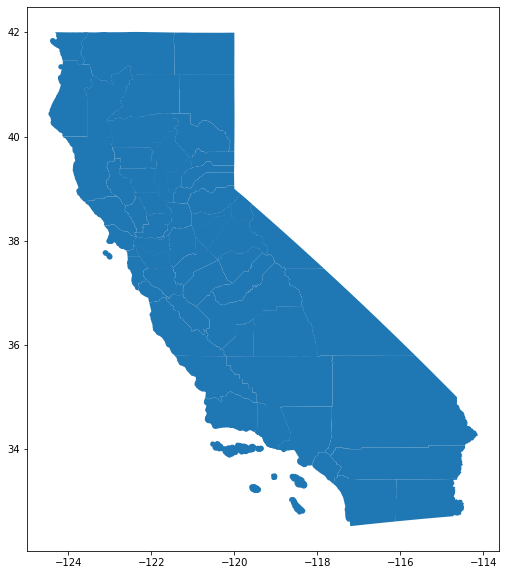

<AxesSubplot:>

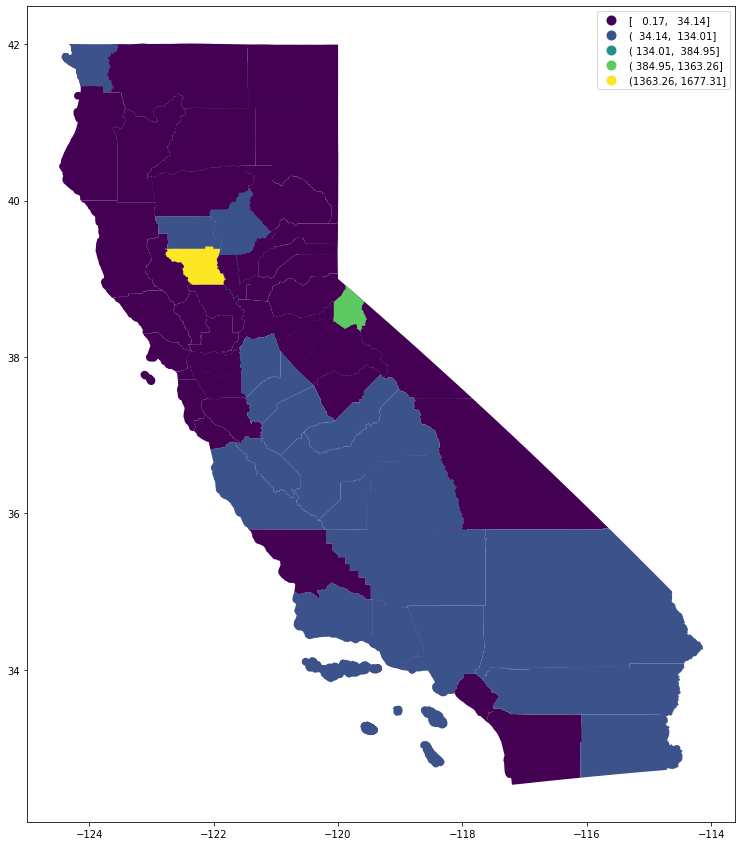

In [179]:
finalrace.plot(column='Latino_rate', scheme='FisherJenks', k=5, legend=True, figsize=(15,15))

In [165]:
finalrace.max()

total_pop       10098052.0
GEOID                   99
county                  99
Latino           4893603.0
Latino_rate    1677.306187
dtype: object

## Latino Population

<AxesSubplot:>

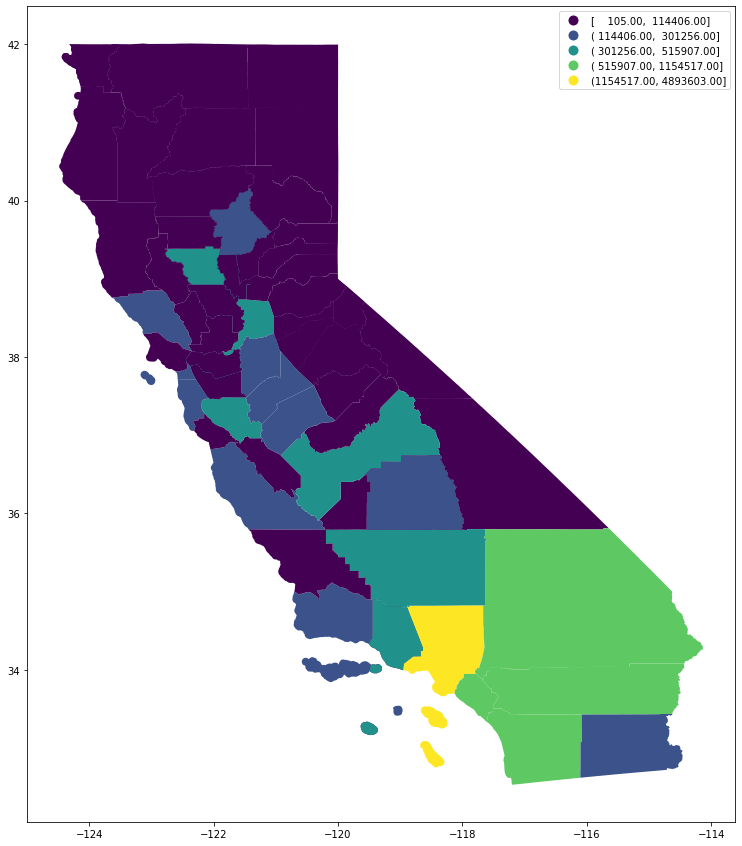

In [166]:
finalrace.plot(column='Latino', scheme='FisherJenks', k=5, legend=True, figsize=(15,15))

<AxesSubplot:>

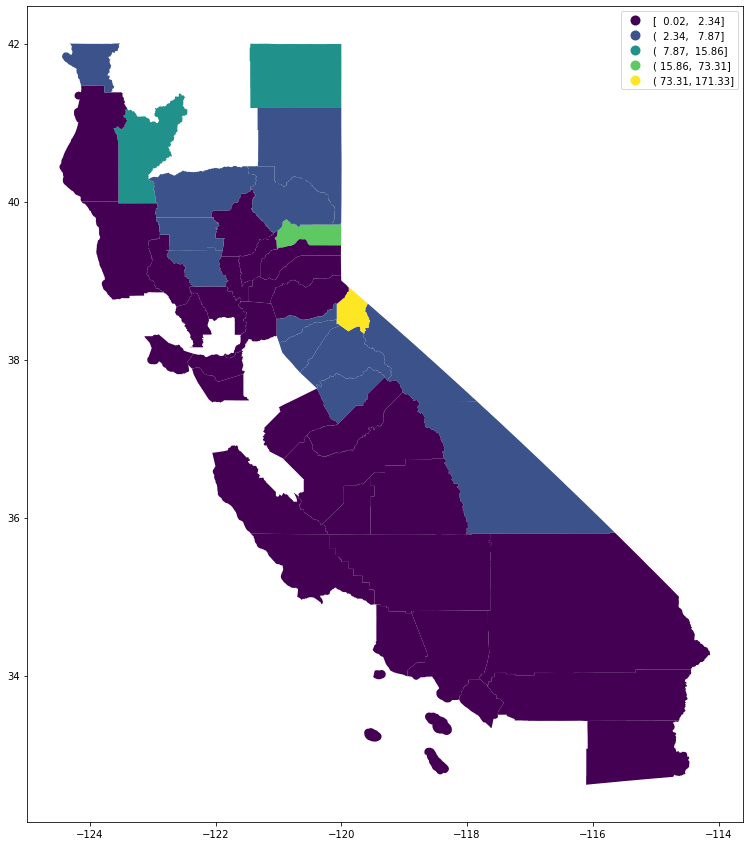

In [80]:
finalrace.plot(column='Latino_rate', scheme='FisherJenks', k=5, legend=True, figsize=(15,15))

In [48]:
finalrace=.merge(latino_county, left_on="geometry", right_on="geometry", how="left")

In [49]:
finalrace.head()

,geoid,geometry,fips,name,state,CountyName_x,Unnamed: 0,Unnamed: 0.1,CountyCode,DistrictCode,...,asian,nh_pi,two_or_more,total_pop,white_rate,black_rate,amind_rate,asian_rate,nh_pi_rate,two_or_more_rate
0,01,"POLYGON ((-122.28088 37.70723, -122.28178 37.7...",1.0,Alameda,CA,Alameda,55058.786260,55058.786260,1.0,58955.743928,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,05,"POLYGON ((-121.02729 38.48136, -121.02729 38.4...",5.0,Amador,CA,Amador,46067.993902,46067.993902,3.0,51356.797834,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,07,"POLYGON ((-121.85650 39.53358, -121.85638 39.5...",7.0,Butte,CA,Butte,51652.976656,51652.976656,4.0,52482.102397,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,09,"POLYGON ((-120.63093 38.34110, -120.63057 38.3...",9.0,Calaveras,CA,Calaveras,48949.265722,48949.265722,5.0,46217.943831,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,11,"POLYGON ((-122.08018 39.41420, -122.07996 39.4...",11.0,Colusa,CA,Colusa,44884.890925,44884.890925,6.0,55662.107692,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
